In [2]:
#basic libraries
import os
import pandas as pd
import numpy as np
#visulaization modules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
data = pd.read_csv('hs_data.csv', delimiter = ',', encoding = 'utf-8')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df2=data.copy()
df2["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

<Figure size 1500x1000 with 0 Axes>

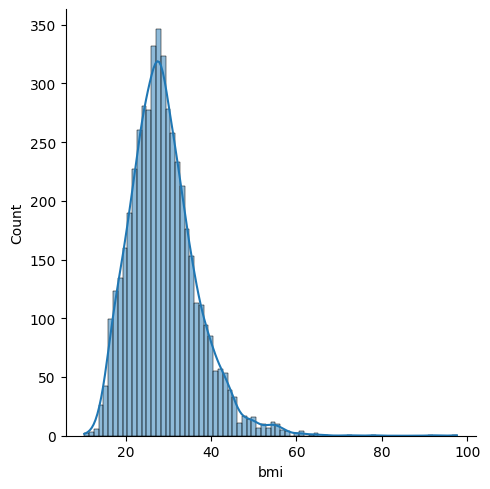

In [6]:
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "bmi", kde = True)

In [7]:
#filling the missings randomly
fill_list = data["bmi"].dropna()
df2 = data["bmi"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0       36.6
1       29.6
2       32.5
3       34.4
4       24.0
        ... 
5105    44.7
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

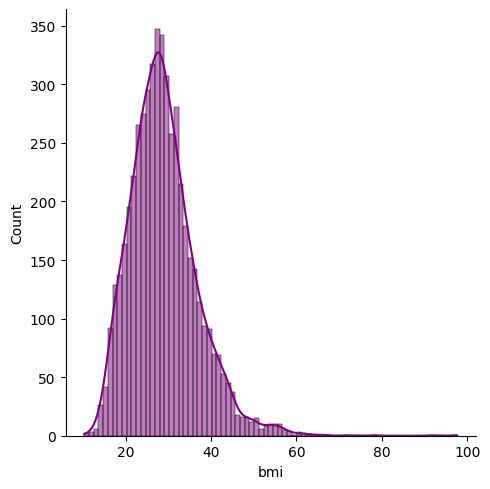

In [8]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [9]:
data["bmi"] = df2
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [12]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],np.nan)
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [13]:
#filling the missings randomly
fill_list = data["smoking_status"].dropna()
df4 = data["smoking_status"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df4.head

<bound method NDFrame.head of 0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109    formerly smoked
Name: smoking_status, Length: 5110, dtype: object>

In [14]:
data = data.loc[(data["gender"] == "Male") | (data["gender"] == "Female") ]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["gender"] = gender_le.fit_transform(data["gender"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2472\3665535088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender"] = gender_le.fit_transform(data["gender"])


In [16]:
data.gender.value_counts()

0    2994
1    2115
Name: gender, dtype: int64

In [17]:
evermarried_le = LabelEncoder()
data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2472\1566033791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])


In [18]:
data.ever_married.value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

In [19]:
worktype_le = LabelEncoder()
data["work_type"] = worktype_le.fit_transform(data["work_type"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2472\4044297169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["work_type"] = worktype_le.fit_transform(data["work_type"])


In [20]:
data.work_type.value_counts()

2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [21]:
residencetype_le = LabelEncoder()
data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2472\504126701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])


In [22]:
data.Residence_type.value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

In [23]:
smoking_status_le = LabelEncoder()
data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2472\74346902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])


In [24]:
data.smoking_status.value_counts()

1    1892
3    1544
0     884
2     789
Name: smoking_status, dtype: int64

In [25]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1


<AxesSubplot:>

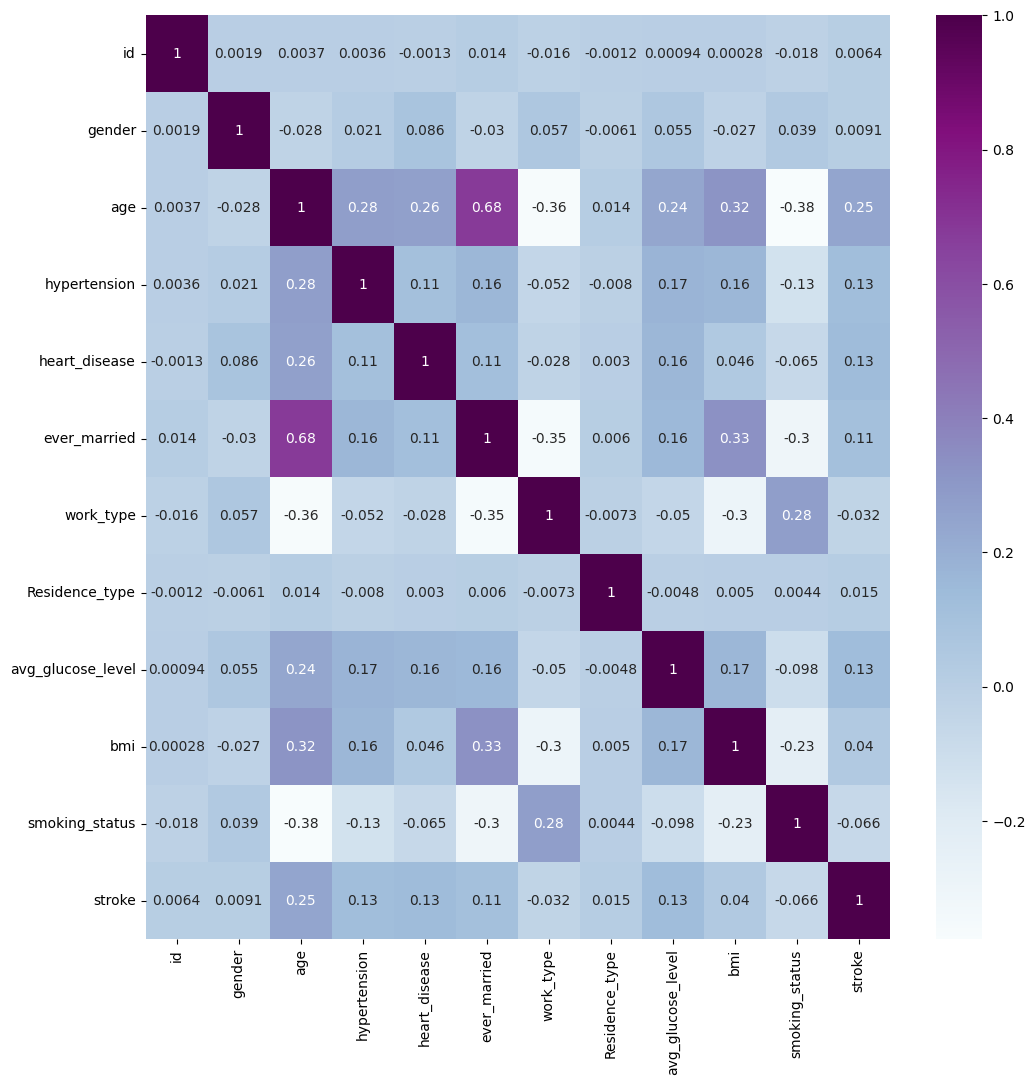

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

In [54]:
from sklearn.linear_model import LogisticRegression
l1=data[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]]
l2=data["stroke"]

In [85]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(l1,l2)

In [62]:
lm=LogisticRegression(solver='lbfgs', max_iter=999)
lm.fit(xt,yt)

LogisticRegression(max_iter=999)

In [75]:
s=lm.predict_proba([[1,67,0,1,0,1,1,228.69,36.6,1]])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.21935999032012243

In [115]:
print("มีความเสี่ยงเป็นโรคหลอดเลือสมองอยู่ที่ "+str(s[0][1]*100)+"%")

มีความเสี่ยงเป็นโรคหลอดเลือสมองอยู่ที่ 21.935999032012244%


In [73]:
d=lm.predict([[1,67,0,1,0,1,1,228.69, 36.6,1]])
d

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [92]:
precode=lm.predict(l1)
precode

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
data["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [95]:
from sklearn import metrics
metrics.confusion_matrix(yt,precode[:1278])

array([[1228,    1],
       [  49,    0]], dtype=int64)

In [96]:
metrics.accuracy_score(yt,precode[:1278])

0.9608763693270735

In [97]:
print(metrics.classification_report(yt,precode[:1278]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1229
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.92      0.96      0.94      1278



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


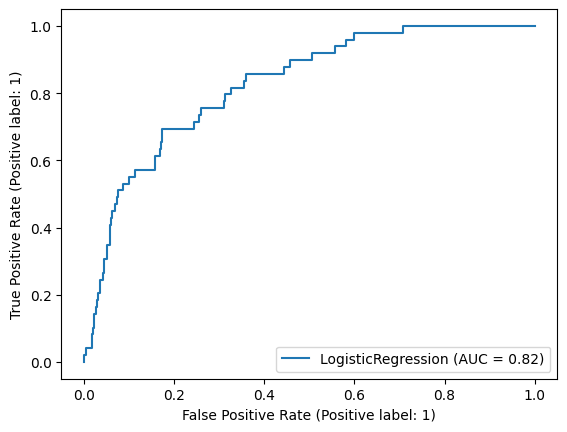

In [116]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lm, xt, yt)